# Analogous cycles experiments for three-to-one match
* The 3-to-1 match example data poses a challenge to the current analogous cycles method. 
* Includes variation of analogous bars method with a different choice of parameter for the witness complex

<mark>Finish writing</mark>

In [1]:
using Pkg
Pkg.activate("../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`


In [2]:
include("../src/analogous_bars.jl")
include("../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var

using DelimitedFiles
using Plots
using CSV
using Distances
using StatsBase

WebIO._IJuliaInit()

# 1. Load data 

In [16]:
# load coordinates of point clouds
P = readdlm("data/complicated_stimulus_space/pointcloud1.csv", ',', Float64)
Q = readdlm("data/complicated_stimulus_space/pointcloud2_small.csv", ',', Float64);

n_P = size(P, 1)
n_Q = size(Q, 1)

println("number of points in P: ", n_P)
println("number of points in Q: ", n_Q)

# Compute dissimilarity matrices 
PC_total = vcat(P, Q)
D = pairwise(Euclidean(), PC_total, dims=1)

D_P = D[1:n_P, 1:n_P]
D_Q = D[n_P+1:end, n_P+1:end]
D_PQ = D[1:n_P, n_P+1:end]
D_QP = Array(transpose(D_PQ))

println("Shape of D: ", size(D))
println("Shape of D1: ", size(D_P))
println("Shape of D2: ", size(D_Q))
println("Shape of D_cross: ", size(D_PQ))

number of points in P: 463
number of points in Q: 500
Shape of D: (963, 963)
Shape of D1: (463, 463)
Shape of D2: (500, 500)
Shape of D_cross: (463, 500)


In [ ]:
p1 = scatter(P[:,1], P[:,2], label = "", title = "P", frame = :box, c = "#00b4bc", titlefontsize = 16)
p2 = scatter(Q[:,1], Q[:,2], label = "", title = "Q", frame = :box, c = "#ee9c33",
     marker = :xcross, markerstrokewidth = 3, titlefontsize = 16)
p = plot(p1, p2, size = (600, 300))
#savefig("data/complicated_stimulus_space/pointclouds.pdf")
plot(p)


In [25]:
# compute persistence
VR_P = eirene(D_P, record = "all", maxdim = 1)
barcode_P = barcode(VR_P, dim = 1)

W = compute_Witness_persistence(D_PQ)
barcode_W = barcode(W["eirene_output"], dim = 1);

VR_Q = eirene(D_Q, record = "all", maxdim = 1)
barcode_Q = barcode(VR_Q, dim = 1);


LoadError: InterruptException:

In [ ]:
# plot PDs

selected_P, cutoff_P = select_persistent_intervals_IQR(barcode_P)
p1 = plot_PD(barcode_P; 
            cutoff = cutoff_P,  
            title = "PD(P)", 
            markersize = 6,
            titlefontsize = 16)

selected_W, cutoff_W = select_persistent_intervals_IQR(barcode_W)
p2 = plot_PD(barcode_W; 
            cutoff = cutoff_W, 
            title = "WPD", 
            markersize = 6,
            titlefontsize = 16)

selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_Q)
p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            title = "PD(Q)", 
            markersize = 6,
            titlefontsize = 16)
p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
#savefig("data/complicated_stimulus_space/PDs.pdf")
plot(p)


In [33]:
selected_W

4-element Vector{Int64}:
 64
 80
 81
 82

In [35]:
cycle_W_P64 = analogous_bars.find_classrep_in_W(W, bar = 64)
cycle_W_P80 = analogous_bars.find_classrep_in_W(W, bar = 80)
cycle_W_P81 = analogous_bars.find_classrep_in_W(W, bar = 81)
cycle_W_P82 = analogous_bars.find_classrep_in_W(W, bar = 82);


In [ ]:
# plot Witness cycles 
p1 = plot_cycle_single(transpose(P), cycle = cycle_W_P64, 
                    cycle_color = :deeppink, c = "#00b4bc", 
                    title = "P", titlefontsize = 16)
p2 = plot_cycle_single(transpose(P), cycle = cycle_W_P80, 
                    cycle_color = :deeppink, c = "#00b4bc", 
                    title = "P", titlefontsize = 16)
p3 = plot_cycle_single(transpose(P), cycle = cycle_W_P81, 
                    cycle_color = :deeppink, c = "#00b4bc", 
                    title = "P", titlefontsize = 16)
p4 = plot_cycle_single(transpose(P), cycle = cycle_W_P82, 
                    cycle_color = :deeppink, c = "#00b4bc", 
                    title = "P", titlefontsize = 16)

p = plot(p1, p2, p3, p4, layout = grid(1,4), size = (1200, 300))
#savefig("data/complicated_stimulus_space/Witness_cycles_P.pdf")
plot(p)

# 2. Analogous cycles (default method)

In [40]:
println("Selected Witness cycles: ", selected_W)

Selected Witness cycles: [64, 80, 81, 82]


In [41]:
analogous_P, analogous_Q, _ = analogous_bars.run_baseline_similarity_analogous(VR_P = VR_P,
                                                                    D_P = D_P,
                                                                    VR_Q = VR_Q,
                                                                    D_Q = D_Q,
                                                                    W_PQ = W,
                                                                    W_PQ_bars = selected_W,
                                                                    dim = 1);

# Plot the analogous cycles

In [63]:
function return_significant_analogous_cycles(analogous_P, significant_P, analogous_Q, significant_Q)
    analogous_P_significant = Dict()
    analogous_Q_significant = Dict()
    
    for k in keys(analogous_P)
        analogous_P_significant[k] = [i for i in analogous_P[k]["baseline_bar_extension"] if i in significant_P]
        analogous_Q_significant[k] = [i for i in analogous_Q[k]["baseline_bar_extension"] if i in significant_Q]
    end

    return analogous_P_significant, analogous_Q_significant
end

return_significant_analogous_cycles (generic function with 1 method)

In [64]:
analogous_P_significant, analogous_Q_significant = return_significant_analogous_cycles(analogous_P, selected_P, analogous_Q, selected_Q)

(Dict{Any, Any}(64 => [83], 81 => [66], 82 => [81], 80 => [69]), Dict{Any, Any}(64 => Int64[], 81 => [78], 82 => [89], 80 => Int64[]))

## Cycle 64

In [ ]:
# plot similarity-centric analogous pairs 
W_idx = 64
p1 = plot_PD(barcode_P; 
            cutoff = cutoff_P,  
            title = "PD(P)", 
            highlight = analogous_P_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)

p2 = plot_PD(barcode_W; 
            cutoff = cutoff_W, 
            title = "WPD", 
            highlight = [W_idx],
            markersize = 6,
            titlefontsize = 16)

p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            title = "PD(Q)", 
            highlight = analogous_Q_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)
p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
#savefig("data/three_to_one_match/set1/analogous_cycles.pdf")
plot(p)

Plot cycle reps of identified points

In [46]:
println("Analogous point in P: ", analogous_P[W_idx]["baseline_bar_extension"])
println("Analogous point in Q: ", analogous_Q[W_idx]["baseline_bar_extension"])

Analogous point in P: [83]
Analogous point in Q: [91]


In [ ]:
# select baseline cycle extension in P
cr_P = get_cyclerep_Eirene(VR_P, 83)
cr_Q = get_cyclerep_Eirene(VR_Q, 91);

p1 = plot_cycle_single(transpose(P), cycle = cr_P, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, cycle_color = :deeppink, 
                         cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
plot(p)

## Cycle 80

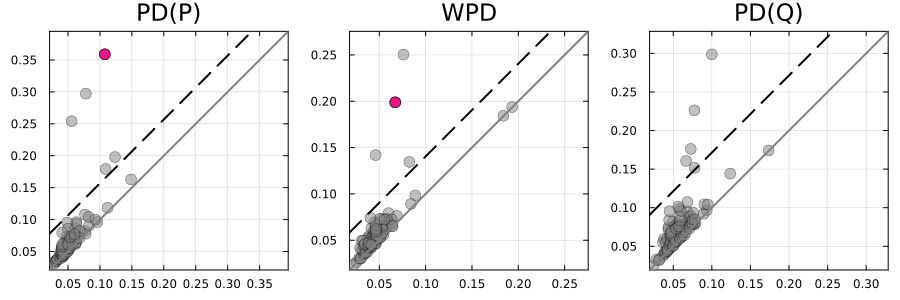

In [131]:
# plot similarity-centric analogous pairs 
W_idx = 80
p1 = plot_PD(barcode_P; 
            cutoff = cutoff_P,  
            title = "PD(P)", 
            highlight = analogous_P_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)

p2 = plot_PD(barcode_W; 
            cutoff = cutoff_W, 
            title = "WPD", 
            highlight = [W_idx],
            markersize = 6,
            titlefontsize = 16)

p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            title = "PD(Q)", 
            highlight = analogous_Q_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)
p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
#savefig("data/three_to_one_match/set1/analogous_cycles.pdf")
plot(p)

In [132]:
println("Analogous point in P: ", analogous_P[W_idx]["baseline_bar_extension"])
println("Analogous point in Q: ", analogous_Q[W_idx]["baseline_bar_extension"])

Analogous point in P: [69]
Analogous point in Q: [28]


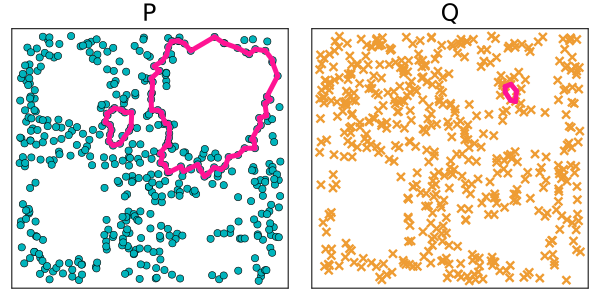

In [133]:
# select baseline cycle extension in P
cr_P = get_cyclerep_Eirene(VR_P, 69)
cr_Q = get_cyclerep_Eirene(VR_Q, 28);

p1 = plot_cycle_single(transpose(P), cycle = cr_P, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, cycle_color = :deeppink, 
                        bc = "#ee9c33", cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
plot(p)

## cycle 81

In [ ]:
# plot similarity-centric analogous pairs 
W_idx = 81
p1 = plot_PD(barcode_P; 
            cutoff = cutoff_P,  
            title = "PD(P)", 
            highlight = analogous_P_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)

p2 = plot_PD(barcode_W; 
            cutoff = cutoff_W, 
            title = "WPD", 
            highlight = [W_idx],
            markersize = 6,
            titlefontsize = 16)

p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            title = "PD(Q)", 
            highlight = analogous_Q_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)
p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
#savefig("data/complicated_stimulus_space/analogous_cycles_81.pdf")
plot(p)

Plot cycle reps of identified points

In [55]:
println("Analogous point in P: ", analogous_P[W_idx]["baseline_bar_extension"])
println("Analogous point in Q: ", analogous_Q[W_idx]["baseline_bar_extension"])

Analogous point in P: [77, 66]
Analogous point in Q: [78]


In [ ]:
# select baseline cycle extension in P
cr_P = get_cyclerep_Eirene(VR_P, 66)
cr_Q = get_cyclerep_Eirene(VR_Q, 78);

p1 = plot_cycle_single(transpose(P), cycle = cr_P, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, cycle_color = :deeppink, 
                        bc = "#ee9c33", cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/complicated_stimulus_space/analogous_cycles_81_cyclerep.pdf")
plot(p)

## cycle 82

In [ ]:
# plot similarity-centric analogous pairs 
W_idx = 82
p1 = plot_PD(barcode_P; 
            cutoff = cutoff_P,  
            title = "PD(P)", 
            highlight = analogous_P_significant[W_idx],
            highlight_color = "#3ce3cc",
            markersize = 6,
            titlefontsize = 16)

p2 = plot_PD(barcode_W; 
            cutoff = cutoff_W, 
            title = "WPD", 
            highlight = [W_idx],
            highlight_color = "#3ce3cc",
            markersize = 6,
            titlefontsize = 16)

p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            title = "PD(Q)", 
            highlight = analogous_Q_significant[W_idx],
            highlight_color = "#3ce3cc",
            markersize = 6,
            titlefontsize = 16)
p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
savefig("data/complicated_stimulus_space/analogous_cycles_82.pdf")
plot(p)

Plot cycle reps of identified points

In [74]:
println("Analogous point in P: ", analogous_P[W_idx]["baseline_bar_extension"])
println("Analogous point in Q: ", analogous_Q[W_idx]["baseline_bar_extension"])

Analogous point in P: [81]
Analogous point in Q: [89]


In [ ]:
# select baseline cycle extension in P
cr_P = get_cyclerep_Eirene(VR_P, 81)
cr_Q = get_cyclerep_Eirene(VR_Q, 89);

p1 = plot_cycle_single(transpose(P), cycle = cr_P, cycle_color = "#3ce3cc", 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, cycle_color = "#3ce3cc", 
                        bc = "#ee9c33", cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/complicated_stimulus_space/analogous_cycles_82_cyclerep.pdf")
plot(p)

# 3. Variation of analogous cycles:  with user-specific choice of Witness complex parameter

## Modified Witness parameter: 
* Immediately prior to the smallest death parameter of all significant VR-points

In [130]:
min_total = analogous_bars.find_min_death_param(barcode_P, selected_P, barcode_Q, selected_Q)

0.1516817410950586

In [162]:
"""Baseline (similarity-centric) analogous cycles 
with Witness parameter variation
"""
function run_analogous_Witness_variation(;
    VR_P::Dict{String, Any} = Dict{String, Any}(),
    D_P::Array{Float64, 2} = Array{Float64}(undef, 0, 0),
    VR_Q::Dict{String, Any} = Dict{String, Any}(),
    D_Q::Array{Float64, 2} = Array{Float64}(undef, 0, 0),
    W_PQ::Dict{Any, Any} = Dict{Any, Any}(),
    W_PQ_bars = [],
    W_param = Inf,
    dim::Int64 = 1)
    
    ##### check input #####
    if VR_P == Dict()
        throw(UndefKeywordError(:VR_P))
    end
    if VR_Q == Dict()
        throw(UndefKeywordError(:VR_Q))
    end
    if W_PQ == Dict()
        throw(UndefKeywordError(:W_PQ))
    end
    if D_P == Array{Float64}(undef, 0, 0)
        throw(UndefKeywordError(:D_P))
    end
    if D_Q == Array{Float64}(undef, 0, 0)
        throw(UndefKeywordError(:D_Q))
    end
    if W_PQ_bars == []
        throw(UndefKeywordError(:W_PQ_class))
    end
    
    analogous_P = Dict()
    analogous_Q = Dict()
    
    ### Compute the dual Witness persistence W(Q,P)
    D_P_Q = W_PQ["distance_matrix"]
    D_Q_P = collect(transpose(D_P_Q))

    # only compute the Witness filtration upto the largest death parameter of the selected bars
    # find maximum parameter
    barcode_W_PQ = barcode(W_PQ["eirene_output"], dim = 1)
    param_max = analogous_bars.find_max_death_param(barcode_W_PQ, W_PQ_bars)
    W_QP = analogous_bars.compute_Witness_persistence(D_Q_P, maxdim = 1, param_max = param_max)

    # find the bar in W(Q,P) that corresponds to W_PQ_bar
    P_to_Q = analogous_bars.apply_Dowker_birth(W_PQ, W_QP, dim = dim)
    println("computed dual Witness filtration")
    
    # for each bar in W_PQ_bars, run similarity-centric analogous bars at specified parameter
    for i in W_PQ_bars
        println("Finding analogous cycles for Witness cycle ", string(i))
        W_PQ_bar = i
        W_QP_bar = P_to_Q[W_PQ_bar]

        
        ############################################################
        # apply the extension method between W(P,Q) and VR(P)
        ############################################################
        
        # if W_param isn't provided then use the default method (do extensions at the parameter immediately prior to death time)
        if W_param == Inf
            param_P = Inf
            # find class rep "tau" of Witness filtration and the parameter immediately prior to the death
            cycle_W_P, psi_W_P =  analogous_bars.find_terminal_class_in_W(W_PQ, bar = W_PQ_bar)
    
            # Find extension of cycle_W_P to VR(P)
            extension_P = analogous_bars.run_baseline_extension_W_to_VR_at_epsilon0(W = W_PQ, 
                                                                    tau = cycle_W_P, 
                                                                    psi = psi_W_P, 
                                                                    C_VR = VR_P, 
                                                                    D_VR = D_P)
        else
            # find class rep "tau" of Witness filtration
            cycle_W_P = analogous_bars.find_classrep_in_W(W_PQ, bar = W_PQ_bar, dim = dim)
            # choose the parameter to be the minimum between W_param and the death parameter of the selected bar.
            d = barcode_W_PQ[W_PQ_bar, 2]
            death_prior = maximum(D_P_Q[D_P_Q.< d])
            param_P = minimum([death_prior, W_param])
        
            # Find extension of cycle_W_P to VR(P). Use the W_param as "psi" parameter
            extension_P = analogous_bars.run_baseline_extension_W_to_VR_at_epsilon0(W = W_PQ, 
                                                                                        tau = cycle_W_P, 
                                                                                        psi = param_P, 
                                                                                        C_VR = VR_P, 
                                                                                        D_VR = D_P)

        end

        # return only the necessary outputs
        extension_P_summary = Dict()
        extension_P_summary["Witness_param"] = param_P
        extension_P_summary["epsilon_0"] = extension_P["epsilon_0"]
        extension_P_summary["comparison"] = extension_P["comparison"]
        extension_P_summary["selected_cycle"] = extension_P["selected_cycle"]
        extension_P_summary["baseline_bar_extension"] = extension_P["baseline_bar_extension"]

        
            
        ############################################################
        # Apply the extension method between W(Q,P) and VR(Q)
        ############################################################
        # if W_param isn't provided then use the default method (do extensions at the parameter immediately prior to death time)
        if W_param == Inf
            param_Q = Inf
            # find class rep "tau" of Witness filtration and the parameter immediately prior to the death
            cycle_W_Q, psi_W_Q =  analogous_bars.find_terminal_class_in_W(W_QP, bar = W_QP_bar)
            # Find extension of cycle_W_Q to VR(Q)
            extension_Q = analogous_bars.run_baseline_extension_W_to_VR_at_epsilon0(W = W_QP, tau = cycle_W_Q, psi = psi_W_Q, C_VR = VR_Q, D_VR = D_Q)
    
        else
            # find class rep "tau" of Witness filtration
            cycle_W_Q = analogous_bars.find_classrep_in_W(W_QP, bar = W_QP_bar, dim = dim)
    
            # choose the parameter to be the minimum between W_param and the death parameter of the selected bar.
            d = barcode_W_PQ[W_PQ_bar, 2]
            death_prior = maximum(D_P_Q[D_P_Q.< d])
            param_Q = minimum([death_prior, W_param])
            
            # Find extension of cycle_W_Q to VR(Q). Use the W_param as "psi" parameter
            extension_Q = analogous_bars.run_baseline_extension_W_to_VR_at_epsilon0(W = W_QP, 
                                                                                    tau = cycle_W_Q, 
                                                                                psi = param_Q, 
                                                                                C_VR = VR_Q, 
                                                                                D_VR = D_Q)

        
        end
        
        extension_Q_summary = Dict()
        extension_Q_summary["Witness_param"] = param_Q
        extension_Q_summary["epsilon_0"] = extension_Q["epsilon_0"]
        extension_Q_summary["comparison"] = extension_Q["comparison"]
        extension_Q_summary["selected_cycle"] = extension_Q["selected_cycle"]
        extension_Q_summary["baseline_bar_extension"] = extension_Q["baseline_bar_extension"]
        
        analogous_P[i] = extension_P_summary
        analogous_Q[i] = extension_Q_summary
    end
    return analogous_P, analogous_Q
end


run_analogous_Witness_variation

In [163]:
analogous_P_mindeath, analogous_Q_mindeath = run_analogous_Witness_variation(
                                                                            VR_P = VR_P,
                                                                            D_P = D_P,
                                                                            VR_Q = VR_Q,
                                                                            D_Q = D_Q,
                                                                            W_PQ = W,
                                                                            W_PQ_bars = selected_W,
                                                                            W_param = min_total * 0.99
                                                                            );

computed dual Witness filtration
Finding analogous cycles for Witness cycle 64
found cycle_W_P
d: 0.14189438434172535
death prior: 0.14186821068077513
found param_P
completed extension_P
Finding analogous cycles for Witness cycle 80
found cycle_W_P
d: 0.198882594083288
death prior: 0.1988772725514715
found param_P
completed extension_P
Finding analogous cycles for Witness cycle 81
found cycle_W_P
d: 0.250403891055207
death prior: 0.2503973660520736
found param_P
completed extension_P
Finding analogous cycles for Witness cycle 82
found cycle_W_P
d: 0.13450279750600672
death prior: 0.1345005341734381
found param_P
completed extension_P


In [181]:
# print the results, using significant cycles only
for i in selected_W
    println("analogous cycles via " * string(i))
    println("baseline bar extension to P:" , [j for j in analogous_P_mindeath[i]["baseline_bar_extension"] if j in selected_P])
    println("baseline bar extension to Q:" , [j for j in analogous_Q_mindeath[i]["baseline_bar_extension"] if j in selected_Q]);
    
end

analogous cycles via 64
baseline bar extension to P:[83]
baseline bar extension to Q:Int64[]
analogous cycles via 80
baseline bar extension to P:[69]
baseline bar extension to Q:[94, 95, 90]
analogous cycles via 81
baseline bar extension to P:[66]
baseline bar extension to Q:[78]
analogous cycles via 82
baseline bar extension to P:[81]
baseline bar extension to Q:[89]


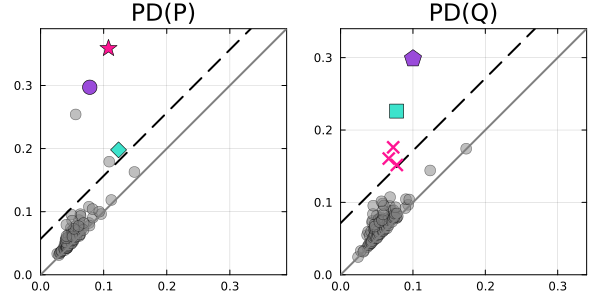

In [236]:
# summary plot fo Witness variation analogous cycles
P_plot_idx = [i for i in 1:size(barcode_P,1) if i ∉ [69, 66, 81]]
p1 = plot_PD(barcode_P[P_plot_idx,:]; 
            cutoff = cutoff_P,  
            title = "PD(P)", 
            markersize = 6,
            titlefontsize = 16,
            pd_min = 0,
            pd_max = 0.39)

# analogous via 80 (deep pink)
scatter!(p1, [barcode_P[69, 1]], [barcode_P[69,2]], 
            label = "", 
            markershape = :star,
            c = :deeppink,
            markersize = 9)

# analogous via 81 (purple)
scatter!(p1, [barcode_P[66, 1]], [barcode_P[66,2]], 
            label = "", 
            c = "#9a4bda",
            markersize = 8)

# analogous via 82 (teal)
scatter!(p1, [barcode_P[81, 1]], [barcode_P[81,2]], 
            label = "", 
            c = "#3ce3cc",
            marker = :diamond,
            markersize = 8)

Q_plot_idx = [i for i in 1:size(barcode_Q,1) if i ∉ [94, 95, 90, 78, 89]]
p2 = plot_PD(barcode_Q[Q_plot_idx,:]; 
            cutoff = cutoff_Q, 
            title = "PD(Q)", 
            markersize = 6,
            titlefontsize = 16,
            pd_min = 0,
            pd_max = 0.34)

# analogous via 80 (deep pink)
scatter!(p2, barcode_Q[[94, 95, 90],1], barcode_Q[[94, 95, 90],2],
        label = "",
        markershape = :xcross,
        markerstrokewidth = 4,
        c = :deeppink,
        markersize = 6)

# analogous via 81 (purple)
scatter!(p2, [barcode_Q[78, 1]], [barcode_Q[78,2]], 
            label = "", 
            c = "#9a4bda",
            markershape = :pentagon,
            markersize = 9)

# analogous via 82 (teal)
scatter!(p2, [barcode_Q[89, 1]], [barcode_Q[89,2]], 
            label = "", 
            c = "#3ce3cc",
            markersize = 7,
            marker = :square)

p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/complicated_stimulus_space/AC_witness_variation_output_PD.pdf")
plot(p)

In [237]:
color_P = Dict()
color_P[69] = "#db2476" # deep pink
color_P[66] = "#9a4bda" # purple
color_P[81] = "#3ce3cc" # teal 
color_P[70] = "#bcb4b4" # grey
color_P[83] = "#bcb4b4" # grey

color_Q = Dict()
color_Q[90] = "#db2476" # deep pink
color_Q[94] = "#db2476" # deep pink
color_Q[95] = "#db2476" # deep pink
color_Q[78] = "#9a4bda" # purple
color_Q[89] = "#3ce3cc" # teal

"#3ce3cc"

In [238]:
for i in selected_P
    cr_P = get_cyclerep_Eirene(VR_P, i)
    filename = "data/complicated_stimulus_space/VR_P_cyclerep_" * string(i) * ".pdf"


    
    p = plot_cycle_single(transpose(P), cycle = cr_P, 
                cycle_color = color_P[i], 
                alpha = 0.5,
                        c = "#00b4bc", cycle_loc = "P"; title = "cycle " * string(i), titlefontsize = 16, legend = false)
    plot(p, size = (300,300))
    savefig(filename)   
end

In [239]:
for i in selected_Q
    cr_Q = get_cyclerep_Eirene(VR_Q, i)
    filename = "data/complicated_stimulus_space/VR_Q_cyclerep_" * string(i) * ".pdf"

    p = plot_cycle_single(transpose(Q), cycle = cr_Q, 
                    cycle_color = color_Q[i], c = "#ee9c33", 
                        cycle_loc = "Q"; 
                        title = "cycle "* string(i), titlefontsize = 16, legend = false,
                        marker = :xcross,
                        alpha = 0.5,
                        markerstrokewidth = 4)
    plot(p, size = (300,300))
    savefig(filename)   
end

# 4. Full analogous cycles

In [107]:
function run_full_similarity_analogous(;
    VR_P::Dict{String, Any} = Dict{String, Any}(),
    D_P::Array{Float64, 2} = Array{Float64}(undef, 0, 0),
    VR_Q::Dict{String, Any} = Dict{String, Any}(),
    D_Q::Array{Float64, 2} = Array{Float64}(undef, 0, 0),
    W_PQ::Dict{Any, Any} = Dict{Any, Any}(),
    W_PQ_bars = [],
    dim::Int64 = 1)
    
    ##### check input #####
    if VR_P == Dict()
        throw(UndefKeywordError(:VR_P))
    end
    if VR_Q == Dict()
        throw(UndefKeywordError(:VR_Q))
    end
    if W_PQ == Dict()
        throw(UndefKeywordError(:W_PQ))
    end
    if D_P == Array{Float64}(undef, 0, 0)
        throw(UndefKeywordError(:D_P))
    end
    if D_Q == Array{Float64}(undef, 0, 0)
        throw(UndefKeywordError(:D_Q))
    end
    if W_PQ_bars == []
        throw(UndefKeywordError(:W_PQ_class))
    end
    
    analogous_P = Dict()
    analogous_Q = Dict()
    
    ### Compute the dual Witness persistence W(Q,P)
    D_P_Q = W_PQ["distance_matrix"]
    D_Q_P = collect(transpose(D_P_Q))

    # only compute the Witness filtration upto the largest death parameter of the selected bars
    # find maximum parameter
    barcode_W_PQ = barcode(W_PQ["eirene_output"], dim = 1)
    param_max = analogous_bars.find_max_death_param(barcode_W_PQ, W_PQ_bars)
    W_QP = analogous_bars.compute_Witness_persistence(D_Q_P, maxdim = 1, param_max = param_max)

    # find the bar in W(Q,P) that corresponds to W_PQ_bar
    P_to_Q = analogous_bars.apply_Dowker_birth(W_PQ, W_QP, dim = dim)
    println("computed dual Witness filtration")
    
    # for each bar in W_PQ_bars, run similarity-centric analogous bars
    for i in W_PQ_bars
        println("Finding full analogous cycles for Witness cycle ", string(i))
        W_PQ_bar = i
        W_QP_bar = P_to_Q[W_PQ_bar]
    
        ##### apply the extension method between W(P,Q) and VR(P) #####
        extension_P = analogous_bars.run_extension_W_to_VR_bar(W = W_PQ, W_bar = W_PQ_bar, C_VR = VR_P, D_VR = D_P, dim = dim)

        ##### apply the extension method between W(P,Q) and VR(P) #####
        extension_Q = analogous_bars.run_extension_W_to_VR_bar(W = W_QP, W_bar = W_QP_bar, C_VR = VR_Q, D_VR = D_Q, dim = dim)
        
        analogous_P[i] = extension_P
        analogous_Q[i] = extension_Q
    end
    return analogous_P, analogous_Q
end


run_full_similarity_analogous (generic function with 1 method)

In [108]:
println("Selected Witness point: ", selected_W)

Selected Witness point: [64, 80, 81, 82]


In [109]:
analogous_P_full, analogous_Q_full = run_full_similarity_analogous(VR_P = VR_P,
                                                            D_P = D_P,
                                                            VR_Q = VR_Q,
                                                            D_Q = D_Q,
                                                            W_PQ = W,
                                                            W_PQ_bars = selected_W);

computed dual Witness filtration
Finding full analogous cycles for Witness cycle 64
Finding full analogous cycles for Witness cycle 80
Finding full analogous cycles for Witness cycle 81
Finding full analogous cycles for Witness cycle 82


<mark>Hmm, the full analogous cycles method finds too much.</mark>

* I wonder if I need to "remove" some simplices in the Witness complex corresponding to significant cycles that already closed up

In [112]:
analogous_64 = organize_baseline_offset_extensions(
                                                analogous_P_full[64],
                                                selected_P,
                                                analogous_Q_full[64],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [83]
  "Q_baseline" => Int64[]
  "Q_offset"   => [[94], [90], [89]]
  "P_offset"   => [[81], [70]]

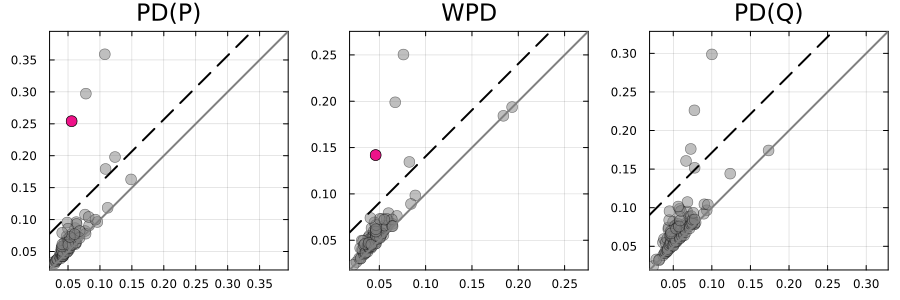

In [118]:
# plot similarity-centric analogous pairs 
W_idx = 64
p1 = plot_PD(barcode_P; 
            cutoff = cutoff_P,  
            title = "PD(P)", 
            highlight = analogous_P_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)

p2 = plot_PD(barcode_W; 
            cutoff = cutoff_W, 
            title = "WPD", 
            highlight = [W_idx],
            markersize = 6,
            titlefontsize = 16)

p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            title = "PD(Q)", 
            highlight = analogous_Q_significant[W_idx],
            markersize = 6,
            titlefontsize = 16)
p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
#savefig("data/three_to_one_match/set1/analogous_cycles.pdf")
plot(p)

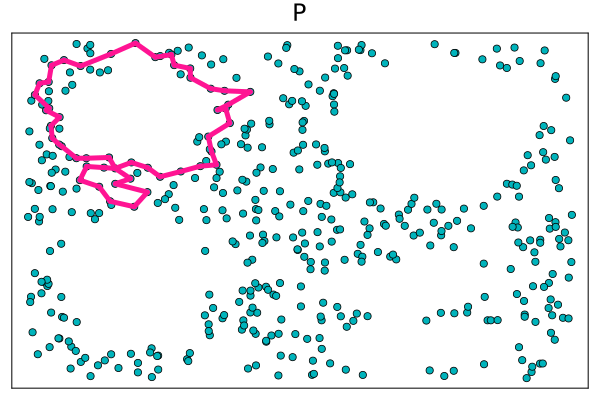

In [129]:
cycle_W_P = analogous_bars.find_classrep_in_W(W, bar = W_idx)
p1 = plot_cycle_single(transpose(P), cycle = cycle_W_P, cycle_color = :deeppink, c = "#00b4bc", title = "P", titlefontsize = 16)

Plot cycle reps of identified points

In [119]:
println("Analogous point in P: ", analogous_P[W_idx]["baseline_bar_extension"])
println("Analogous point in Q: ", analogous_Q[W_idx]["baseline_bar_extension"])

Analogous point in P: [83]
Analogous point in Q: [91]


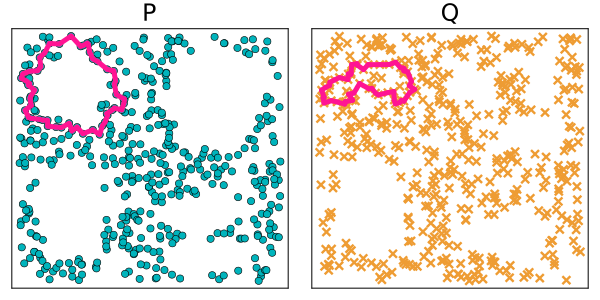

In [120]:
# select baseline cycle extension in P
cr_P = get_cyclerep_Eirene(VR_P, 83)
cr_Q = get_cyclerep_Eirene(VR_Q, 91);

p1 = plot_cycle_single(transpose(P), cycle = cr_P, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, cycle_color = :deeppink, 
                         cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
plot(p)

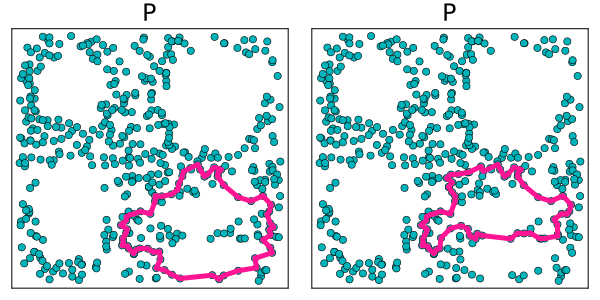

In [122]:
# plot offset significant cycles in P
cr_P_81 = get_cyclerep_Eirene(VR_P, 81)
cr_P_70 = get_cyclerep_Eirene(VR_P, 70);

p1 = plot_cycle_single(transpose(P), cycle = cr_P_81, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)

p2 = plot_cycle_single(transpose(P), cycle = cr_P_70, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)


p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
plot(p)

In [ ]:
[94], [90], [89]

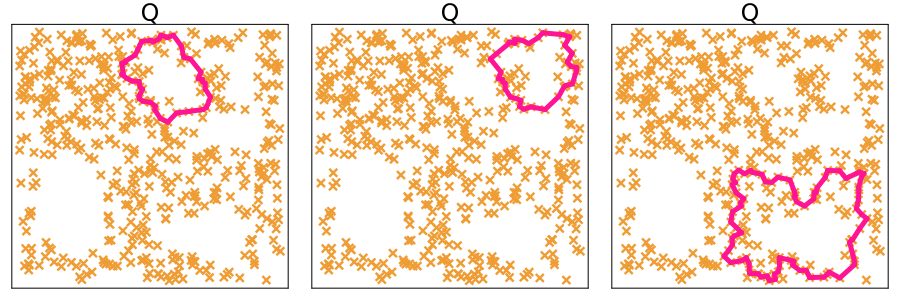

In [127]:
# offset in Q
# plot offset significant cycles in P
cr_Q_94 = get_cyclerep_Eirene(VR_Q, 94)
cr_Q_90 = get_cyclerep_Eirene(VR_Q, 90)
cr_Q_89 = get_cyclerep_Eirene(VR_Q, 89);

p1 = plot_cycle_single(transpose(Q), cycle = cr_Q_94, cycle_color = :deeppink, 
                         cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p2 = plot_cycle_single(transpose(Q), cycle = cr_Q_90, cycle_color = :deeppink, 
                         cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p3 = plot_cycle_single(transpose(Q), cycle = cr_Q_89, cycle_color = :deeppink, 
                         cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markercolor = "#ee9c33",
                        markerstrokewidth = 4)

p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
plot(p)


In [370]:
analogous_64 = organize_baseline_offset_extensions(
                                                analogous_P_full[64],
                                                selected_P,
                                                analogous_Q_full[64],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [83]
  "Q_baseline" => Int64[]
  "Q_offset"   => [[94], [90], [89]]
  "P_offset"   => [[81], [70]]

In [380]:
barcode_P[83,2]

0.2540960595480798

In [381]:
barcode_Q[94,2]

0.1605863667523903

In [369]:
analogous_80 = organize_baseline_offset_extensions(
                                                analogous_P_full[80],
                                                selected_P,
                                                analogous_Q_full[80],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [69]
  "Q_baseline" => Int64[]
  "Q_offset"   => [[95], [89], [94], [90]]
  "P_offset"   => [[70], [81]]

In [368]:
analogous_81 = organize_baseline_offset_extensions(
                                                analogous_P_full[81],
                                                selected_P,
                                                analogous_Q_full[81],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [66]
  "Q_baseline" => [78]
  "Q_offset"   => Any[]
  "P_offset"   => [[69], [70], [81]]

In [367]:
analogous_82 = organize_baseline_offset_extensions(
                                                analogous_P_full[82],
                                                selected_P,
                                                analogous_Q_full[82],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [81]
  "Q_baseline" => [89]
  "Q_offset"   => [[94]]
  "P_offset"   => [[81]]

Plot the baseline and offset analogous cycles

In [ ]:
p1 = plot_PD(barcode_P; 
            cutoff = cutoff_P,  
            highlight = analogous["P_baseline"],
            title = "PD(P)", 
            markersize = 6,
            titlefontsize = 16)

p2 = plot_PD(barcode_W; 
            cutoff = cutoff_W, 
            highlight = [W_idx],
            title = "WPD", 
            markersize = 6,
            titlefontsize = 16)

p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            highlight = analogous["Q_baseline"],
            title = "PD(Q)", 
            markersize = 6,
            titlefontsize = 16)

p = plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))
#savefig("data/three_to_one_match/set1/analogous_cycles_baseline.pdf")
plot(p)


In [ ]:
p1 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            highlight = [42],
            title = "PD(Q)", 
            markersize = 6,
            titlefontsize = 16)

p2 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            highlight = [49],
            title = "PD(Q)", 
            markersize = 6,
            titlefontsize = 16)

p3 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            highlight = [57],
            title = "PD(Q)", 
            markersize = 6,
            titlefontsize = 16)

p4 = plot_PD(barcode_Q; 
            cutoff = cutoff_Q, 
            highlight = [54],
            title = "PD(Q)", 
            markersize = 6,
            titlefontsize = 16)

p = plot(p1, p2, p3, p4, layout = grid(1, 4), size = (1200, 300))
#savefig("data/three_to_one_match/set1/analogous_cycles_offset_Q.pdf")
plot(p)


In [ ]:
# plot the four cycle representatives

# select baseline cycle extension in P

cr_Q1 = get_cyclerep_Eirene(VR_Q, 42)
cr_Q2 = get_cyclerep_Eirene(VR_Q, 49)
cr_Q3 = get_cyclerep_Eirene(VR_Q, 57)
cr_Q4 = get_cyclerep_Eirene(VR_Q, 54)


p1 = plot_cycle_single(transpose(Q), cycle = cr_Q1, cycle_color = :deeppink, c = "#ee9c33", cycle_loc = "Q"; 
                        title = "Q", titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markerstrokewidth = 4)
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q2, cycle_color = :deeppink, c = "#ee9c33", cycle_loc = "Q"; 
title = "Q", titlefontsize = 16, legend = false,
marker = :xcross,
markerstrokewidth = 4)

p3 = plot_cycle_single(transpose(Q), cycle = cr_Q3, cycle_color = :deeppink, c = "#ee9c33", cycle_loc = "Q"; 
title = "Q", titlefontsize = 16, legend = false,
marker = :xcross,
markerstrokewidth = 4)

p4 = plot_cycle_single(transpose(Q), cycle = cr_Q4, cycle_color = :deeppink, c = "#ee9c33", cycle_loc = "Q"; 
title = "Q", titlefontsize = 16, legend = false,
marker = :xcross,
markerstrokewidth = 4)

p = plot(p1, p2, p3, p4, layout = grid(1,4), size = (1200, 300))
#savefig("data/three_to_one_match/set1/offset_Q_cyclerep.pdf")
plot(p)

# Full analogous cycles variation (don't fill in all witness simplices)


In [247]:
# find the death parameters of significant bars  
death_params_significant = barcode_W[selected_W,2]

4-element Vector{Float64}:
 0.14189438434172535
 0.198882594083288
 0.250403891055207
 0.13450279750600672

In [249]:
test_param = death_params_significant[4]

0.13450279750600672

In [ ]:
analogous_P_full_var, analogous_Q_full_var = run_full_similarity_analogous_var(VR_P = VR_P,
                                                            D_P = D_P,
                                                            VR_Q = VR_Q,
                                                            D_Q = D_Q,
                                                            W_PQ = W,
                                                            W_PQ_bars = selected_W,
                                                            excluded_params = death_params_significant);

computed dual Witness filtration
Finding full analogous cycles for Witness cycle 64
Finding full analogous cycles for Witness cycle 

In [ ]:
# let's work with analogous_P_full at index 64. 
# why are there offsets so far from 
# baseline extension to P: 83
# offset: 70, 81

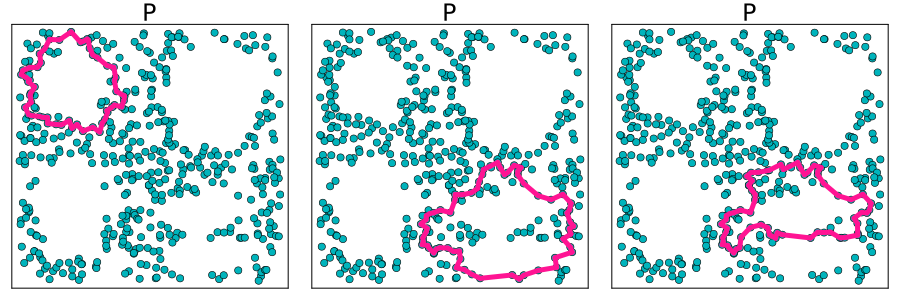

In [382]:
# select baseline cycle extension in P
cr_P_83 = get_cyclerep_Eirene(VR_P, 83)
cr_P_81 = get_cyclerep_Eirene(VR_P, 81)
cr_P_70 = get_cyclerep_Eirene(VR_P, 70);

p1 = plot_cycle_single(transpose(P), cycle = cr_P_83, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)

p2 = plot_cycle_single(transpose(P), cycle = cr_P_81, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)

p3 = plot_cycle_single(transpose(P), cycle = cr_P_70, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)

p = plot(p1, p2, p3, layout = grid(1,3), size = (900, 300))
plot(p)

Witness cycle 64 -> VR_P 83 (top left cycle)

Witness cycle 82 -> VR_P 81 (The larger circle in bottom right)

In [385]:
println("Witness cycle 64 death param: ", barcode_W[64,2])
println("Witness cycle 82 death param: ", barcode_W[82,2])

Witness cycle 64 death param: 0.14189438434172535
Witness cycle 82 death param: 0.13450279750600672


In [388]:
    # find parameter delta(tau)-1
d = barcode_W[64, 2]
psi = maximum(D_PQ[D_PQ.< d])

0.14186821068077513

In [ ]:
# build the Witness complex at immediately before the death parameter of 64

W_index2simplex, W_simplex2index, fv, _, _ = analogous_bars.build_Witness_complex(D_PQ, psi)

In [391]:
println("number of 2-simplices of the witness complex:" , length(fv[3]))

number of 2-simplices of the witness complex:344109


In [401]:
W_index2simplex_excluded, W_simplex2index_excluded, fv_excluded, _, _ = build_Witness_complex_with_excluded_2simplices(D_PQ, psi,
                                                                        excluded_params = death_params_significant);

In [403]:
println("number of 2-simplices of the witness complex with excluded parameters: ", length(fv_excluded[3]))

number of 2-simplices of the witness complex with excluded parameters: 344094


In [404]:
death_params_significant

4-element Vector{Float64}:
 0.14189438434172535
 0.198882594083288
 0.250403891055207
 0.13450279750600672

<mark> check that VR cycle 82 is trivial in original Witness complex, 
but VR cycle 82 is nontrivial in the excluded Witness complex. </mark>



In [ ]:
# build the auxiliary filtration
C_aux, Wpsi_index2simplex, Wpsi_simplex2index, Wpsi_index2simplex_default_vertex, Wpsi_default_vertex_simplex2index,Wpsi_vertex_to_default_vertex, default_vertex_to_Wpsi_vertex = analogous_bars.build_auxiliary_filtration_W_to_VR(D_PQ, psi, D_P);

In [425]:
# write VR cycle 82 in terms of Witness complex indices
cr_P_82 = get_cyclerep_Eirene(VR_P, 82);
cr_P_83 = get_cyclerep_Eirene(VR_P, 83);

In [413]:
default_vertex_to_Wpsi_vertex

In [422]:
# express given cycle as a list of indices in C_Wepsilon, using the indexing of C_Wepsilon
cycle_idx_81 = [Wpsi_simplex2index[sort(item)] for item in cr_P_81];
homologous = analogous_bars.check_homologous_cycles([], cycle_idx_82, C_aux)


In [426]:
# express given cycle as a list of indices in C_Wepsilon, using the indexing of C_Wepsilon
cycle_idx_83 = [Wpsi_simplex2index[sort(item)] for item in cr_P_83];
homologous = analogous_bars.check_homologous_cycles([], cycle_idx_83, C_aux)


false

Auxiliary filtration, using excluded parameters

In [ ]:
# build the auxiliary filtration
C_aux_excluded, Wpsi_index2simplex_excluded, Wpsi_simplex2index_excluded, Wpsi_index2simplex_default_vertex_excluded, Wpsi_default_vertex_simplex2index_excluded, Wpsi_vertex_to_default_vertex_excluded, default_vertex_to_Wpsi_vertex_excluded = build_auxiliary_filtration_W_to_VR_var(D_PQ, psi, D_P, excluded_params = death_params_significant);

In [442]:
default_vertex_to_Wpsi_vertex_excluded

In [443]:
# express given cycle as a list of indices in C_Wepsilon, using the indexing of C_Wepsilon
cycle_idx_81 = [Wpsi_simplex2index_excluded[sort(item)] for item in cr_P_81];
homologous = analogous_bars.check_homologous_cycles([], cycle_idx_81, C_aux_excluded)


true

<mark> Hmmm this shouldn't be the case</mark>

In [432]:
# express given cycle as a list of indices in C_Wepsilon, using the indexing of C_Wepsilon
cycle_idx_83 = [Wpsi_simplex2index_excluded[sort(item)] for item in cr_P_83];
homologous = analogous_bars.check_homologous_cycles([], cycle_idx_83, C_aux_excluded)


false

What if we just create the Witness complex before the death time of any significant bar?

In [444]:
    # find parameter delta(tau)-1
d = minimum(barcode_W[selected_W, 2])
psi = maximum(D_PQ[D_PQ.< d])

0.1345005341734381

In [445]:
barcode_W[selected_W,2]

4-element Vector{Float64}:
 0.14189438434172535
 0.198882594083288
 0.250403891055207
 0.13450279750600672

In [435]:
# build the auxiliary filtration
C_aux, Wpsi_index2simplex, Wpsi_simplex2index, Wpsi_index2simplex_default_vertex, Wpsi_default_vertex_simplex2index,Wpsi_vertex_to_default_vertex, default_vertex_to_Wpsi_vertex = analogous_bars.build_auxiliary_filtration_W_to_VR(D_PQ, psi, D_P);

In [440]:
# write VR cycle 82 in terms of Witness complex indices
cr_P_81 = get_cyclerep_Eirene(VR_P, 81);
cr_P_83 = get_cyclerep_Eirene(VR_P, 83);

In [437]:
default_vertex_to_Wpsi_vertex

In [441]:
# express given cycle as a list of indices in C_Wepsilon, using the indexing of C_Wepsilon
cycle_idx_81 = [Wpsi_simplex2index[sort(item)] for item in cr_P_81];
homologous = analogous_bars.check_homologous_cycles([], cycle_idx_81, C_aux)


false

In [439]:
# express given cycle as a list of indices in C_Wepsilon, using the indexing of C_Wepsilon
cycle_idx_83 = [Wpsi_simplex2index[sort(item)] for item in cr_P_83];
homologous = analogous_bars.check_homologous_cycles([], cycle_idx_83, C_aux)


false

<mark> So run full analogous cycles using the smallest death parameter
of all selected witness points </mark>
* The issue was that even if I remove simplices before they are filled in, there are larger parameters that will eventually fill the cycle of interest

<mark>Check the following cell on July 18 </mark>

In [571]:
analogous_P_full_var, analogous_Q_full_var = run_full_similarity_analogous_var(VR_P = VR_P,
                                                            D_P = D_P,
                                                            VR_Q = VR_Q,
                                                            D_Q = D_Q,
                                                            W_PQ = W,
                                                            W_PQ_bars = selected_W);

computed dual Witness filtration
Finding full analogous cycles for Witness cycle 64
extension to P complete
extension to Q complete
Finding full analogous cycles for Witness cycle 80
extension to P complete
extension to Q complete
Finding full analogous cycles for Witness cycle 81
extension to P complete
extension to Q complete
Finding full analogous cycles for Witness cycle 82
extension to P complete
extension to Q complete


In [586]:
analogous_Q_full_var[80]["offset_bar_extension"]

Dict{Any, Any} with 6 entries:
  70 => [94]
  67 => [75]
  69 => [18]
  68 => [76]
  72 => [80]
  66 => [17]

In [592]:
analogous_Q_full[80]["offset_bar_extension"]

Dict{Any, Any} with 79 entries:
  56 => [65]
  35 => [11]
  55 => [64]
  60 => [68]
  30 => [42]
  32 => [44]
  67 => [74]
  45 => [13]
  73 => [79]
  64 => [72]
  90 => [93]
  54 => [63]
  63 => [71]
  86 => [89]
  91 => [94]
  62 => [70]
  58 => [67]
  52 => [61]
  28 => [41]
  23 => [9]
  92 => [95]
  41 => [51]
  43 => [53]
  69 => [75]
  36 => [12]
  ⋮  => ⋮

In [587]:
selected_Q

5-element Vector{Int64}:
 78
 89
 90
 94
 95

In [580]:
selected_W

4-element Vector{Int64}:
 64
 80
 81
 82

In [593]:
analogous_64_var = organize_baseline_offset_extensions(
                                                analogous_P_full_var[64],
                                                selected_P,
                                                analogous_Q_full_var[64],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [83]
  "Q_baseline" => Int64[]
  "Q_offset"   => [[94]]
  "P_offset"   => [[81], [70]]

In [594]:
analogous_80_var = organize_baseline_offset_extensions(
                                                analogous_P_full_var[80],
                                                selected_P,
                                                analogous_Q_full_var[80],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [69]
  "Q_baseline" => [94, 95, 90]
  "Q_offset"   => [[94]]
  "P_offset"   => [[81], [70]]

In [595]:
analogous_81_var = organize_baseline_offset_extensions(
                                                analogous_P_full_var[81],
                                                selected_P,
                                                analogous_Q_full_var[81],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [66]
  "Q_baseline" => [78]
  "Q_offset"   => [[94]]
  "P_offset"   => [[81], [70]]

In [596]:
analogous_82_var = organize_baseline_offset_extensions(
                                                analogous_P_full_var[82],
                                                selected_P,
                                                analogous_Q_full_var[82],
                                                selected_Q,
                                                )

Dict{Any, Any} with 4 entries:
  "P_baseline" => [81]
  "Q_baseline" => [89]
  "Q_offset"   => [[94]]
  "P_offset"   => [[81]]

In [499]:
# cycle 81 + 72
cycle_idx_81 = [Wpsi_simplex2index[sort(item)] for item in cr_P_81];
cycle_idx_72 = [Wpsi_simplex2index[sort(item)] for item in cr_P_72];
cycle_idx_81_72 = vcat(cycle_idx_81, cycle_idx_72)

homologous = analogous_bars.check_homologous_cycles([], cycle_idx_81_72, C_aux)


true

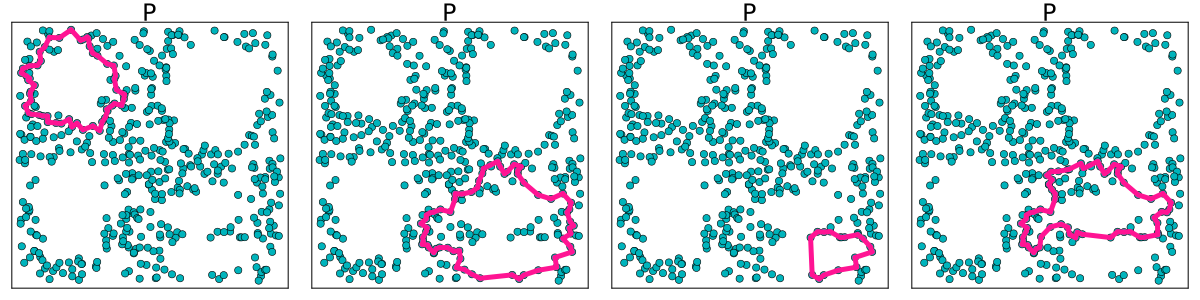

In [506]:
# write VR cycle 82 in terms of Witness complex indices
cr_P_83 = get_cyclerep_Eirene(VR_P, 83);
cr_P_81 = get_cyclerep_Eirene(VR_P, 81);
cr_P_72 = get_cyclerep_Eirene(VR_P, 72);
cr_P_70 = get_cyclerep_Eirene(VR_P, 70)

p1 = plot_cycle_single(transpose(P), cycle = cr_P_83, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)

p2 = plot_cycle_single(transpose(P), cycle = cr_P_81, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)

p3 = plot_cycle_single(transpose(P), cycle = cr_P_72, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)

p4 = plot_cycle_single(transpose(P), cycle = cr_P_70, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "P", titlefontsize = 16, legend = false)


p = plot(p1, p2, p3, p4, layout = grid(1,4), size = (1200, 300))
plot(p)

In [ ]:
# maybe return only the cycle extensions that consist of precisely
# the selected bars?

# problem with this: the more complicated matches (even a circle and a torus)
# the baseline extensions involved many many more points

# so asking to return only extensions involving just the selected cycles
# isn't going to work. 

# does it make sense to ask the baseline to contain selected cylces + others
# whereas the offsets must consist of precisely just the selected cycles? 

In [569]:
function run_extension_W_to_VR_var(
    C_aux, 
    Wpsi_index2simplex, 
    Wpsi_simplex2index, 
    Wpsi_index2simplex_default_vertex, 
    Wpsi_default_vertex_simplex2index,
    Wpsi_vertex_to_default_vertex, 
    default_vertex_to_Wpsi_vertex;
    W::Dict{Any, Any} = Dict{Any, Any}(),
    W_cycle::Array{Array{Int64,1},1} = [[0,0]],
    psi::Float64 = -1.0,
    C_VR::Dict{String, Any} = Dict{String, Any}(),
    D_VR::Array{Float64, 2} = Array{Float64}(undef, 0, 0),
    dim::Int64 = 1)
    
    # unpack variables
    C_W = W["eirene_output"]
    D_W = W["distance_matrix"]
    W_index2simplex = W["index2simplex"]
    W_fv = W["fv"]
    
    # build the auxiliary filtration
    #C_aux, Wpsi_index2simplex, Wpsi_simplex2index, Wpsi_index2simplex_default_vertex, Wpsi_default_vertex_simplex2index,Wpsi_vertex_to_default_vertex, default_vertex_to_Wpsi_vertex = build_auxiliary_filtration_W_to_VR(D_W, psi, D_VR, dim = dim)
    
    # find epsilon_0, Fbar_representation_tau
    
    epsilon_0, Fbar_representation_tau = analogous_bars.find_epsilon0_Fbar_representation_tau_WtoVR_large_limit(W_cycle, C_aux, Wpsi_default_vertex_simplex2index)
    
    # find p_Y and BARS_short
    #max_pY = maximum(barcode(C_VR, dim = dim)[:,2])
    p_Y, BARS_short = analogous_bars.find_pY_and_BARSshort(C_aux, 
                                            epsilon_0, 
                                            dim = dim) 
#                                            max_pY = max_pY)
    
    # find cyclereps of Fbar_representation_tau and BARS_short using DEFAULT VERTEX FORMAT
    cycle_reps = analogous_bars.find_cyclereps_auxiliary_WtoVR(Fbar_representation_tau, BARS_short, C_aux, Wpsi_index2simplex_default_vertex)
    
    # check the minimum parameter at which one can find the boundary matrix from Eirene -- resolved with Eirene_var
    #min_epsilon_with_boundary = analogous_bars.return_min_parameter_with_boundary_matrix(D_VR, p_Y)
    #pY_new = [i for i in p_Y if i >= min_epsilon_with_boundary]
    
     # find component-wise bar-representations
    Ybar_rep_tau, Ybar_rep_short_epsilon0, Ybar_rep_short = analogous_bars.find_all_bar_representations(C_aux, 
                                                                                         p_Y, 
                                                                                         cycle_reps, 
                                                                                         C_VR, 
                                                                                         D_VR, 
                                                                                         dim = dim)
    
    # create summary (by parameter)
    nontrivial_pY, nontrivial_pY_dict, cycle_extensions, bar_extensions = analogous_bars.create_summary_by_parameter(cycle_reps, 
                                                                                        Ybar_rep_tau, 
                                                                                        Ybar_rep_short_epsilon0, 
                                                                                        Ybar_rep_short, 
                                                                                        epsilon_0, 
                                                                                        C_aux,
                                                                                        C_VR)
       
    ### create output dictionary
    extension = Dict()
    # input data
    extension["comparison"] = "W to VR"
    extension["C_W"] = C_W
    extension["C_VR"] = C_VR
    extension["dim"] = dim 
    extension["selected_cycle"] = W_cycle 
    # auxiliary filtration & cyclerep
    extension["C_auxiliary_filtration"] = C_aux
    extension["aux_filt_cyclerep"] = cycle_reps
    # parameters pY
    extension["p_Y"] = p_Y
    extension["epsilon_0"] = epsilon_0
    #extension["min_epsilon_with_boundary"] = min_epsilon_with_boundary
    # component-wise Ybar representations
    extension["baseline_bar_extension"] = Ybar_rep_tau
    extension["offset_bar_extension_epsilon0"] = Ybar_rep_short_epsilon0
    extension["offset_bar_extension"] = Ybar_rep_short
    # exploring results by parameter
    extension["nontrivial_pY"] = nontrivial_pY
    extension["nontrivial_pY_dict"] = nontrivial_pY_dict
    extension["cycle_extensions"] = cycle_extensions
    extension["bar_extensions"] = bar_extensions

    return extension
end

run_extension_W_to_VR_var (generic function with 2 methods)

In [570]:
function run_full_similarity_analogous_var(;
    VR_P::Dict{String, Any} = Dict{String, Any}(),
    D_P::Array{Float64, 2} = Array{Float64}(undef, 0, 0),
    VR_Q::Dict{String, Any} = Dict{String, Any}(),
    D_Q::Array{Float64, 2} = Array{Float64}(undef, 0, 0),
    W_PQ::Dict{Any, Any} = Dict{Any, Any}(),
    W_PQ_bars = [],
    dim::Int64 = 1)
    
    ##### check input #####
    if VR_P == Dict()
        throw(UndefKeywordError(:VR_P))
    end
    if VR_Q == Dict()
        throw(UndefKeywordError(:VR_Q))
    end
    if W_PQ == Dict()
        throw(UndefKeywordError(:W_PQ))
    end
    if D_P == Array{Float64}(undef, 0, 0)
        throw(UndefKeywordError(:D_P))
    end
    if D_Q == Array{Float64}(undef, 0, 0)
        throw(UndefKeywordError(:D_Q))
    end
    if W_PQ_bars == []
        throw(UndefKeywordError(:W_PQ_class))
    end
    
    analogous_P = Dict()
    analogous_Q = Dict()
    
    ### Compute the dual Witness persistence W(Q,P)
    D_P_Q = W_PQ["distance_matrix"]
    D_Q_P = collect(transpose(D_P_Q))

    # only compute the Witness filtration upto the parameter before 
    # the minimum death time of all selected bars
    barcode_W_PQ = barcode(W_PQ["eirene_output"], dim = 1)
    d = minimum(barcode_W_PQ[W_PQ_bars, 2])
    psi = maximum(D_P_Q[D_P_Q.< d])
    W_QP = analogous_bars.compute_Witness_persistence(D_Q_P, maxdim = 1, param_max = psi)
    
    # find the bar in W(Q,P) that corresponds to W_PQ_bar
    P_to_Q = analogous_bars.apply_Dowker_birth(W_PQ, W_QP, dim = dim)
    println("computed dual Witness filtration")

    # fix the auxiliary filtration for extension_P
    C_aux_P, Wpsi_index2simplex_P, Wpsi_simplex2index_P, Wpsi_index2simplex_default_vertex_P, Wpsi_default_vertex_simplex2index_P, Wpsi_vertex_to_default_vertex_P, default_vertex_to_Wpsi_vertex_P = analogous_bars.build_auxiliary_filtration_W_to_VR(D_P_Q, psi, D_P, dim = dim)
    C_aux_Q, Wpsi_index2simplex_Q, Wpsi_simplex2index_Q, Wpsi_index2simplex_default_vertex_Q, Wpsi_default_vertex_simplex2index_Q, Wpsi_vertex_to_default_vertex_Q, default_vertex_to_Wpsi_vertex_Q = analogous_bars.build_auxiliary_filtration_W_to_VR(D_Q_P, psi, D_Q, dim = dim)
    
    
    # for each bar in W_PQ_bars, run similarity-centric analogous bars
    for i in W_PQ_bars
        println("Finding full analogous cycles for Witness cycle ", string(i))
        W_PQ_bar = i
        W_QP_bar = P_to_Q[W_PQ_bar]
    
        ##### apply the extension method between W(P,Q) and VR(P) #####
        #extension_P = analogous_bars.run_extension_W_to_VR_bar(W = W_PQ, W_bar = W_PQ_bar, C_VR = VR_P, D_VR = D_P, dim = dim)

        # find class rep "tau" of Witness filtration
        cycle_W_P = analogous_bars.find_classrep_in_W(W_PQ, bar = W_PQ_bar, dim = dim)
        
        
        # Find extension of cycle_W_P to VR(P). Use the W_param as "psi" parameter
        extension_P =  run_extension_W_to_VR_var(C_aux_P, 
                                                Wpsi_index2simplex_P, 
                                                Wpsi_simplex2index_P, 
                                                Wpsi_index2simplex_default_vertex_P, 
                                                Wpsi_default_vertex_simplex2index_P,
                                                Wpsi_vertex_to_default_vertex_P, 
                                                default_vertex_to_Wpsi_vertex_P,
                                                W = W_PQ, 
                                                  W_cycle = cycle_W_P, 
                                                  psi = param_P, 
                                                  C_VR = VR_P, 
                                                  D_VR = D_P)
                            
        # return only the necessary outputs
        extension_P_summary = Dict()
        extension_P_summary["Witness_param"] = param_P
        extension_P_summary["epsilon_0"] = extension_P["epsilon_0"]
        extension_P_summary["comparison"] = extension_P["comparison"]
        extension_P_summary["selected_cycle"] = extension_P["selected_cycle"]
        extension_P_summary["baseline_bar_extension"] = extension_P["baseline_bar_extension"]
        extension_P_summary["offset_bar_extension_epsilon0"] = extension_P["offset_bar_extension_epsilon0"]
        extension_P_summary["offset_bar_extension"] = extension_P["offset_bar_extension"]
        println("extension to P complete")
        
        ##### apply the extension method between W(P,Q) and VR(P) #####
        # find class rep "tau" of Witness filtration
        cycle_W_Q = analogous_bars.find_classrep_in_W(W_QP, bar = W_QP_bar, dim = dim)

        # choose the parameter to be the minimum between W_param and the death parameter of the selected bar.
        
        # Find extension of cycle_W_Q to VR(Q). Use the W_param as "psi" parameter
        extension_Q = run_extension_W_to_VR_var(C_aux_Q, 
                                                Wpsi_index2simplex_Q, 
                                                Wpsi_simplex2index_Q, 
                                                Wpsi_index2simplex_default_vertex_Q, 
                                                Wpsi_default_vertex_simplex2index_Q,
                                                Wpsi_vertex_to_default_vertex_Q, 
                                                default_vertex_to_Wpsi_vertex_Q,
                                                W = W_QP, 
                                                W_cycle = cycle_W_Q, 
                                                psi = param_Q, 
                                                C_VR = VR_Q, 
                                                D_VR = D_Q)
        # return only the necessary outputs
        extension_Q_summary = Dict()
        extension_Q_summary["Witness_param"] = param_Q
        extension_Q_summary["epsilon_0"] = extension_Q["epsilon_0"]
        extension_Q_summary["comparison"] = extension_Q["comparison"]
        extension_Q_summary["selected_cycle"] = extension_Q["selected_cycle"]
        extension_Q_summary["baseline_bar_extension"] = extension_Q["baseline_bar_extension"]
        extension_Q_summary["offset_bar_extension_epsilon0"] = extension_Q["offset_bar_extension_epsilon0"]
        extension_Q_summary["offset_bar_extension"] = extension_Q["offset_bar_extension"]
        println("extension to Q complete")
        
        analogous_P[i] = extension_P_summary
        analogous_Q[i] = extension_Q_summary
    end
    return analogous_P, analogous_Q
end


run_full_similarity_analogous_var (generic function with 1 method)

In [257]:
using Combinatorics

# Plot Witness cycles

In [ ]:
W_PQ = W 

# find death parameter of selected Witness cycle
W_death_param = analogous_bars.find_max_death_param(barcode_W, [W_idx])

# compute the dual
W_QP, P_to_Q = analogous_bars.compute_Dowker_dual(W_PQ, param_max = W_death_param)
W_QP_idx = P_to_Q[W_idx]

# find cycle, psi in W_P and W_Q
cycle_W_P, _ =  analogous_bars.find_terminal_class_in_W(W_PQ, bar = W_idx)

cycle_W_P = analogous_bars.find_classrep_in_W(W_PQ, bar = W_idx)
cycle_W_Q = analogous_bars.find_classrep_in_W(W_QP, bar = W_QP_idx);

In [ ]:
# plot Witness cycles 
p1 = plot_cycle_single(transpose(P), cycle = cycle_W_P, cycle_color = :deeppink, c = "#00b4bc", title = "P", titlefontsize = 16)
p2 = plot_cycle_single(transpose(Q), cycle = cycle_W_Q, cycle_color = :deeppink, c = "#ee9c33", title = "Q", titlefontsize = 16,
                    marker = :xcross,
                    markerstrokewidth = 4)
p = plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/ambiguous_match/set1/Witness_cycles.pdf")
plot(p)

# Plot Witness complexes

Plot Witness complexes near the birth time of the Witness cycle

In [ ]:
param = 0.064
p1 = plot_Dowker_complex(D_PQ, param, P, show_2simplex = true, sample_proportion = 0.7, c =  "#00b4bc")

# plot on PC2
p2 = plot_Dowker_complex(D_QP, param, Q; show_2simplex = true, 
                                sample_proportion = 0.4,
                                markershape = :xcross, 
                                markerstrokewidth = 4, 
                                c =   "#ee9c33")
p = plot(p1, p2, size = (600, 300))

#savefig("data/ambiguous_match/set1/Witness_complexes_birthparam.png")
plot(p)


Plot Witness complexes near the min death param

In [ ]:
param = min_total * 0.99
p1 = plot_Dowker_complex(D_PQ, param, P, show_2simplex = true, sample_proportion = 0.03, c =  "#00b4bc")

# plot on PC2
p2 = plot_Dowker_complex(D_QP, param, Q; show_2simplex = true, 
                                sample_proportion = 0.01,
                                markershape = :xcross, 
                                markerstrokewidth = 4, 
                                c =   "#ee9c33")
p = plot(p1, p2, size = (600, 300))

#savefig("data/three_to_one_match/set1/Witness_complexes_mindeath.png")
plot(p)

Plot Witness complexes at the very last death param (default)

In [ ]:
# find death parameter of selected Witness cycle
W_death_param = analogous_bars.find_max_death_param(barcode_W, [W_idx])

In [ ]:
param = 0.18
p1 = plot_Dowker_complex(D_PQ, param, P, show_2simplex = true, sample_proportion = 0.02, c =  "#00b4bc")

# plot on PC2
p2 = plot_Dowker_complex(D_QP, param, Q; show_2simplex = true, 
                                sample_proportion = 0.001,
                                markershape = :xcross, 
                                markerstrokewidth = 4, 
                                c =   "#ee9c33")
p = plot(p1, p2, size = (600, 300))

#savefig("data/three_to_one_match/set1/Witness_complexes_death.png")
plot(p)

# Plot significant cycles in PD(P), PD(Q)

In [142]:
for i in selected_P
    cr_P = get_cyclerep_Eirene(VR_P, i)
    filename = "data/complicated_stimulus_space/VR_P_cyclerep_" * string(i) * ".pdf"

    p = plot_cycle_single(transpose(P), cycle = cr_P, cycle_color = :deeppink, 
                        c = "#00b4bc", cycle_loc = "P"; title = "cycle " * string(i), titlefontsize = 16, legend = false)
    plot(p, size = (300,300))
    savefig(filename)   
end

In [144]:
for i in selected_Q
    cr_Q = get_cyclerep_Eirene(VR_Q, i)
    filename = "data/complicated_stimulus_space/VR_Q_cyclerep_" * string(i) * ".pdf"

    p = plot_cycle_single(transpose(Q), cycle = cr_Q, cycle_color = :deeppink, c = "#ee9c33", cycle_loc = "Q"; 
                        title = "cycle "* string(i), titlefontsize = 16, legend = false,
                        marker = :xcross,
                        markerstrokewidth = 4)
    plot(p, size = (300,300))
    savefig(filename)   
end